In [4]:
import pandas as pd

In [5]:
sales_df = pd.read_csv('../csv/Sales.csv', sep=';')

In [6]:
sales_df.shape

(48, 15)

In [7]:
sales_df.head()

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Order ID,Customer ID,Order Date,Order Status,Order Quantity,Order Total,Payment Method
0,1001,Mountain BIKES,Cross Country,TrailBlazer 1000,Lightweight and versatile,1200.0,25.0,m,2001,3001,2023-03-01,Shipped,2,2400.0,Credit Card
1,1002,Mountain Bikes,Cross Country,TrailBlazer 2000,High-performance mountain bike,1500.0,22.0,l,2002,3002,2023-03-02,Processing,1,1500.0,PayPal
2,1003,Road Bikes,Racing,SpeedMaster 1000,Agile and aerodynamic road bike,1800.0,18.0,S,2003,3003,2023-03-03,Cancelled,3,5400.0,Credit Card
3,1004,Road BIKES,Racing,SpeedMaster 2000,Premium racing road bike,2100.0,16.0,L,2004,3004,2023-03-04,Shipped,1,2100.0,Credit Card
4,1005,Touring Bikes,Long Distance,Explorer 1000,Comfortable and durable touring bike,1300.0,27.0,M,2005,3005,2023-03-05,Processing,2,2600.0,PayPal


In [8]:
sales_df.columns

Index(['Product ID', 'Product Category', 'Product Subcategory', 'Product Name',
       'Product Description', 'Product Price', 'Product Weight',
       'Product Size', 'Order ID', 'Customer ID', 'Order Date', 'Order Status',
       'Order Quantity', 'Order Total', 'Payment Method'],
      dtype='object')

### What kind of information can you gather from the provided dataset in relation to product, order, and customer details?
### How can you use the data fields provided to understand sales trends and customer preferences? Briefly discuss your suggested approach for gaining insight into these two aspects separately.
### Explain how the other data sources within Adventure Works might be relevant to your analysis or add value to your insights. 

I can look for how much sales has that product, how much was the income, and with the costumer ID I can see the tipe of product related to that ID

In [9]:
columns = ['Product ID', 'Product Category', 'Product Subcategory', 'Product Name',
       'Product Description', 'Product Price', 'Product Weight',
       'Product Size', 'Order ID', 'Customer ID', 'Order Date', 'Order Status',
       'Order Quantity', 'Order Total', 'Payment Method']

for column in columns:
 unique_values = sales_df[column].unique()
 print(f"\nUnique values in {column}:\n")
 print(unique_values)


Unique values in Product ID:

[1001 1002 1003 1004 1005 1006 1007 1008 1021 1022 1023 1024 1025 1026
 1027 1028 1041 1042 1043 1044 1045 1046 1047 1048 1061 1062 1063 1064
 1065 1066 1067 1068 1081 1082 1083 1084 1085 1086 1087 1088 1101 1102
 1103 1104 1105 1106 1107 1108]

Unique values in Product Category:

['Mountain BIKES' 'Mountain Bikes' 'Road Bikes' 'Road BIKES'
 'Touring Bikes' 'mountain BIKES' 'road Bikes' 'mountain bikes' 'E-Bikes'
 'ROAD BIKES' 'Hybrid Bikes' 'Kids Bikes' 'BMX Bikes']

Unique values in Product Subcategory:

['Cross Country' 'Racing' 'Long Distance' 'Downhill' 'Trail' 'Touring' nan
 'Adventure' 'Enduro' 'Fat Bikes' 'Cyclocross' 'Tandem' 'Electric' 'City'
 'Gravel' 'Folding' 'Mountain' 'Commuter' 'Aero' 'Recumbent' 'Balance'
 'Freestyle' 'Endurance']

Unique values in Product Name:

[' TrailBlazer 1000 ' 'TrailBlazer 2000' 'SpeedMaster 1000 '
 'SpeedMaster 2000' 'Explorer 1000 ' 'Explorer 2000' 'GravityMaster 1000'
 '       GravityMaster 2000 ' 'Pathfinder 1

#### Aha !! 
#### Unique values in Product Category & Product Size:

['Mountain BIKES' 'Mountain Bikes' 'Road Bikes' 'Road BIKES'
 'Touring Bikes' 'mountain BIKES' 'road Bikes' 'mountain bikes' 'E-Bikes'
 'ROAD BIKES' 'Hybrid Bikes' 'Kids Bikes' 'BMX Bikes']

['m' 'l' 'S' 'L' 'M' 's']

 #### WE MUST UNITE THEM !

In [10]:
sales_df['Product Category'] = sales_df['Product Category'].str.lower().str.strip()

# Define a dictionary of standardized categories
standardized_categories = {
 'mountain bikes': 'mountain bikes',
 'road bikes': 'road bikes',
 'touring bikes': 'touring bikes',
 'e-bikes': 'e-bikes',
 'hybrid bikes': 'hybrid bikes',
 'kids bikes': 'kids bikes',
 'bmx bikes': 'bmx bikes'
}

# Replace variations of the same category with the standardized version
for key, value in standardized_categories.items():
    sales_df['Product Category'] = sales_df['Product Category'].str.replace(key, value)

sales_df['Product Category'].unique()

array(['mountain bikes', 'road bikes', 'touring bikes', 'e-bikes',
       'hybrid bikes', 'kids bikes', 'bmx bikes'], dtype=object)

In [11]:
sales_df['Product Size'] = sales_df['Product Size'].str.lower().str.strip()

# Define a dictionary of standardized sizes
standardized_sizes = {
 'm': 'm',
 'l': 'l',
 's': 's',
}

# Replace variations of the same size with the standardized version
for key, value in standardized_sizes.items():
    sales_df['Product Size'] = sales_df['Product Size'].str.replace(key, value)

sales_df['Product Size'].unique()

array(['m', 'l', 's'], dtype=object)

In [12]:
columns = ['Product Category', 'Product Subcategory', 'Product Name',
       'Product Description', 'Product Price', 'Product Weight',
       'Product Size', 'Order ID', 'Customer ID', 'Order Date', 'Order Status',
       'Order Quantity', 'Order Total', 'Payment Method']

for column in columns:
 value_counts = sales_df[column].value_counts()
 print(f"\value counts in {column}:\n")
 print(value_counts)

alue counts in Product Category:

Product Category
mountain bikes    16
road bikes        12
touring bikes     10
e-bikes            4
hybrid bikes       2
kids bikes         2
bmx bikes          2
Name: count, dtype: int64
alue counts in Product Subcategory:

Product Subcategory
Cross Country    4
Downhill         4
City             2
Freestyle        2
Balance          2
Recumbent        2
Aero             2
Commuter         2
Mountain         2
Folding          2
Gravel           2
Electric         2
Racing           2
Tandem           2
Cyclocross       2
Fat Bikes        2
Enduro           2
Touring          2
Trail            2
Long Distance    2
Endurance        2
Adventure        1
Name: count, dtype: int64
alue counts in Product Name:

Product Name
 TrailBlazer 1000             1
TrailBlazer 2000              1
GravelMaster 1000             1
GravelMaster 2000             1
FoldAway 1000                 1
FoldAway 2000                 1
E-TrailBlazer 1000            1
E-Tra

In [13]:
columns = ['Product Category', 'Product Subcategory', 'Product Name', 'Product Description', 'Product Price', 'Product Weight', 'Product Size']

for column in columns:
 grouped_df = sales_df.groupby(column)[['Order Quantity', 'Order Total']].sum().reset_index()
 print(f"\nGrouped DataFrame for {column}:\n")
 display(grouped_df)


Grouped DataFrame for Product Category:



,Product Category,Order Quantity,Order Total
0,bmx bikes,4,1800.0
1,e-bikes,6,16600.0
2,hybrid bikes,3,3900.0
3,kids bikes,3,500.0
4,mountain bikes,24,50400.0
5,road bikes,23,48100.0
6,touring bikes,15,26500.0



Grouped DataFrame for Product Subcategory:



,Product Subcategory,Order Quantity,Order Total
0,Adventure,1,1800.0
1,Aero,4,11600.0
2,Balance,3,500.0
3,City,3,6500.0
4,Commuter,3,3900.0
5,Cross Country,6,9900.0
6,Cyclocross,4,7900.0
7,Downhill,6,16000.0
8,Electric,3,9500.0
9,Endurance,3,6800.0



Grouped DataFrame for Product Name:



,Product Name,Order Quantity,Order Total
0,GravityMaster 2000,1,2500.0
1,Voyager 1000,3,5100.0
2,TrailBlazer 1000,2,2400.0
3,Adventurer 1000,2,3000.0
4,Adventurer 2000,1,1800.0
5,AeroSpeed 1000,3,8400.0
6,AeroSpeed 2000,1,3200.0
7,CommutePro 1000,2,2400.0
8,CommutePro 2000,1,1500.0
9,CrossRider 1000,3,5700.0



Grouped DataFrame for Product Description:



,Product Description,Order Quantity,Order Total
0,Advanced aerodynamic road bike,1,3200.0
1,Advanced cyclocross bike,1,2200.0
2,Advanced folding touring bike,1,1800.0
3,Advanced freestyle BMX bike,1,600.0
4,Advanced touring bike,1,1600.0
5,Advanced touring road bike,1,2000.0
6,Aerodynamic road bike,3,8400.0
7,Agile and aerodynamic road bike,3,5400.0
8,Agile trail bike for all skill levels,2,2200.0
9,All-terrain fat bike,2,2600.0



Grouped DataFrame for Product Price:



,Product Price,Order Quantity,Order Total
0,150.0,2,300.0
1,200.0,1,200.0
2,400.0,3,1200.0
3,600.0,1,600.0
4,1100.0,2,2200.0
5,1200.0,4,4800.0
6,1300.0,4,5200.0
7,1400.0,1,1400.0
8,1500.0,6,9000.0
9,1600.0,2,3200.0



Grouped DataFrame for Product Weight:



,Product Weight,Order Quantity,Order Total
0,9.0,1,200.0
1,10.0,2,300.0
2,16.0,2,5300.0
3,18.0,8,18400.0
4,19.0,1,2200.0
5,20.0,6,11400.0
6,21.0,4,7100.0
7,22.0,4,6600.0
8,23.0,1,600.0
9,24.0,3,3800.0



Grouped DataFrame for Product Size:



,Product Size,Order Quantity,Order Total
0,l,24,51400.0
1,m,47,82400.0
2,s,7,14000.0


### In product categroies, they sell a lot of mountain bikes & road bikes. 
### Maybe they can sell more kids bikes

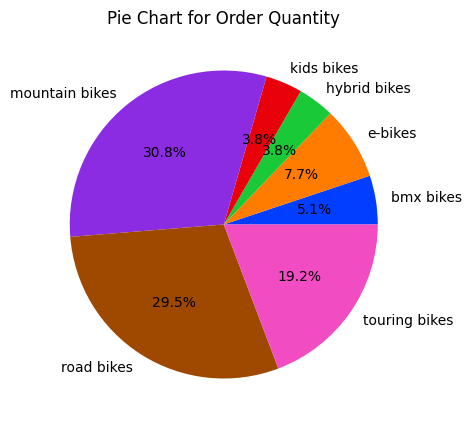

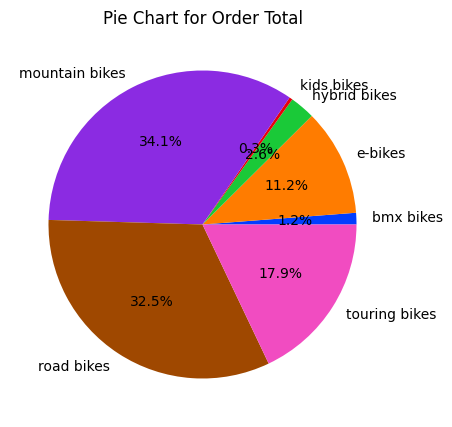

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Product Category' and sum the 'Order Quantity' and 'Order Total' columns
grouped_df = sales_df.groupby('Product Category')[['Order Quantity', 'Order Total']].sum().reset_index()

# List of columns to plot
columns = ['Order Quantity', 'Order Total']

for column in columns:
    # Get the counts of unique values in the 'Product Category' column
    data = grouped_df[column]
    labels = grouped_df['Product Category']
    colors = sns.color_palette('bright', len(labels))

    # Create a pie chart
    plt.figure(figsize=(10, 5)) # Optional: Set the figure size
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.show()

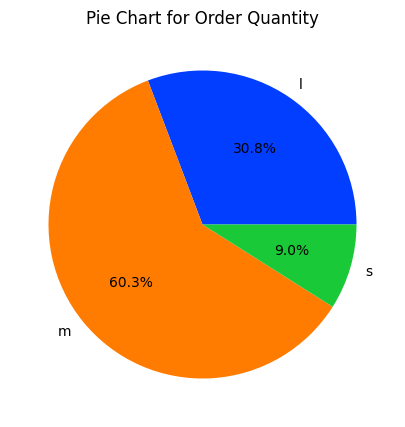

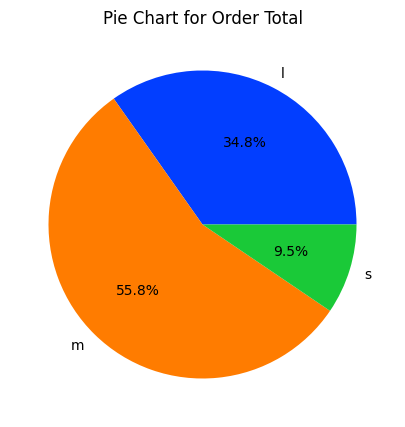

In [15]:
# Group the data by 'Product Category' and sum the 'Order Quantity' and 'Order Total' columns
grouped_df = sales_df.groupby('Product Size')[['Order Quantity', 'Order Total']].sum().reset_index()

# List of columns to plot
columns = ['Order Quantity', 'Order Total']

for column in columns:
    # Get the counts of unique values in the 'Product Category' column
    data = grouped_df[column]
    labels = grouped_df['Product Size']
    colors = sns.color_palette('bright', len(labels))

    # Create a pie chart
    plt.figure(figsize=(10, 5)) # Optional: Set the figure size
    plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {column}')
    plt.show()

### Maybe can try to sell more small bikes

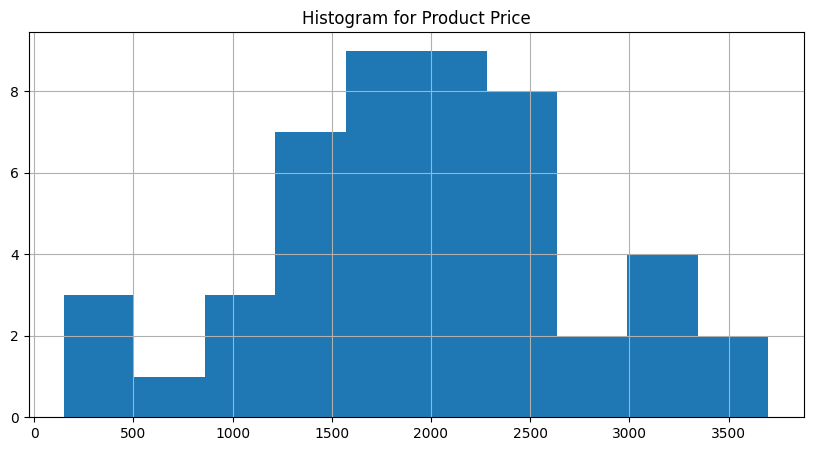

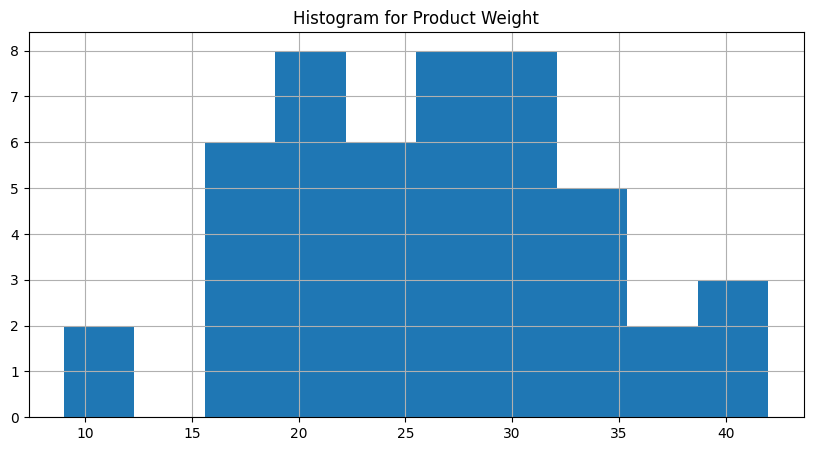

In [16]:
columns = ['Product Price', 'Product Weight']

for column in columns:
    # Ensure the column is numeric
    sales_df[column] = pd.to_numeric(sales_df[column])

    # Create a histogram
    plt.figure(figsize=(10, 5)) # Optional: Set the figure size
    sales_df[column].hist(bins=10)
    plt.title(f'Histogram for {column}')
    plt.show()



### Also the bikes over 35 costumer dont like them
### And I still seeing that kidz bikes could be an oportunity, every kid has a bike
### Why the kids dont has adventure world bikes?

### Finally the better price for a bike is arround 20000

# COSTUMER ID

In [17]:
sales_df['Customer ID'].unique()

array([3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3021, 3022, 3023,
       3024, 3025, 3026, 3027, 3028, 3041, 3042, 3043, 3044, 3045, 3046,
       3047, 3048, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3081,
       3082, 3083, 3084, 3085, 3086, 3087, 3088, 3101, 3102, 3103, 3104,
       3105, 3106, 3107, 3108])

In [18]:
sales_df.columns

Index(['Product ID', 'Product Category', 'Product Subcategory', 'Product Name',
       'Product Description', 'Product Price', 'Product Weight',
       'Product Size', 'Order ID', 'Customer ID', 'Order Date', 'Order Status',
       'Order Quantity', 'Order Total', 'Payment Method'],
      dtype='object')

In [19]:
 grouped_df = sales_df.groupby('Customer ID')[['Order Quantity', 'Order Total']].sum().reset_index()
 print(f"\nGrouped DataFrame for Customer ID:\n")
 display(grouped_df)


Grouped DataFrame for Customer ID:



,Customer ID,Order Quantity,Order Total
0,3001,2,2400.0
1,3002,1,1500.0
2,3003,3,5400.0
3,3004,1,2100.0
4,3005,2,2600.0
5,3006,1,1600.0
6,3007,2,4400.0
7,3008,1,2500.0
8,3021,2,2200.0
9,3022,1,1400.0


In [20]:
sales_df['Customer ID'].value_counts()

Customer ID
3001    1
3002    1
3063    1
3064    1
3065    1
3066    1
3067    1
3068    1
3081    1
3082    1
3083    1
3084    1
3085    1
3086    1
3087    1
3088    1
3101    1
3102    1
3103    1
3104    1
3105    1
3106    1
3107    1
3062    1
3061    1
3048    1
3024    1
3003    1
3004    1
3005    1
3006    1
3007    1
3008    1
3021    1
3022    1
3023    1
3025    1
3047    1
3026    1
3027    1
3028    1
3041    1
3042    1
3043    1
3044    1
3045    1
3046    1
3108    1
Name: count, dtype: int64

#### I want to know what costumer by more than one bike

In [21]:
costumer_2 = sales_df[sales_df['Order Quantity'] == 2]
costumer_3 = sales_df[sales_df['Order Quantity'] == 3]

In [22]:
costumer_2.columns

Index(['Product ID', 'Product Category', 'Product Subcategory', 'Product Name',
       'Product Description', 'Product Price', 'Product Weight',
       'Product Size', 'Order ID', 'Customer ID', 'Order Date', 'Order Status',
       'Order Quantity', 'Order Total', 'Payment Method'],
      dtype='object')

In [23]:
costumer_2[['Customer ID', 'Product Category', 'Product Name', 'Order Quantity', 'Order Date', 'Product Size' ]].sort_values('Product Category')

,Customer ID,Product Category,Product Name,Order Quantity,Order Date,Product Size
30,3067,e-bikes,E-TrailBlazer 1000,2,2023-03-07,m
24,3061,e-bikes,UrbanEco 1000,2,2023-03-01,s
32,3081,hybrid bikes,CommutePro 1000,2,2023-02-19,m
40,3101,kids bikes,LittleBalancer 1000,2,2023-02-01,m
0,3001,mountain bikes,TrailBlazer 1000,2,2023-03-01,m
38,3087,mountain bikes,DownhillDominator 1000,2,2023-02-25,m
44,3105,mountain bikes,XC-Rider 1000,2,2023-02-05,m
22,3047,mountain bikes,E-Mountain 1000,2,2023-03-17,m
16,3041,mountain bikes,FatTrail 1000,2,2023-03-11,m
14,3027,mountain bikes,EnduroMaster 1000,2,2023-03-27,s


In [24]:
costumer_2[['Customer ID', 'Product Category', 'Product Name', 'Order Quantity', 'Order Date', 'Product Size' ]].sort_values('Order Date')

,Customer ID,Product Category,Product Name,Order Quantity,Order Date,Product Size
40,3101,kids bikes,LittleBalancer 1000,2,2023-02-01,m
44,3105,mountain bikes,XC-Rider 1000,2,2023-02-05,m
46,3107,road bikes,EnduranceElite 1000,2,2023-02-07,m
32,3081,hybrid bikes,CommutePro 1000,2,2023-02-19,m
36,3085,touring bikes,ReclineRider 1000,2,2023-02-23,m
38,3087,mountain bikes,DownhillDominator 1000,2,2023-02-25,m
24,3061,e-bikes,UrbanEco 1000,2,2023-03-01,s
0,3001,mountain bikes,TrailBlazer 1000,2,2023-03-01,m
28,3065,touring bikes,FoldAway 1000,2,2023-03-05,m
4,3005,touring bikes,Explorer 1000,2,2023-03-05,m


In [25]:
costumer_3[['Customer ID', 'Product Category', 'Product Name', 'Order Quantity', 'Order Date', 'Product Size' ]].sort_values('Product Category')

,Customer ID,Product Category,Product Name,Order Quantity,Order Date,Product Size
42,3103,bmx bikes,FreestyleMaster 1000,3,2023-02-03,m
2,3003,road bikes,SpeedMaster 1000,3,2023-03-03,s
10,3023,road bikes,Voyager 1000,3,2023-03-23,m
18,3043,road bikes,CrossRider 1000,3,2023-03-13,m
26,3063,road bikes,GravelMaster 1000,3,2023-03-03,m
34,3083,road bikes,AeroSpeed 1000,3,2023-02-21,m


In [26]:
costumer_3[['Customer ID', 'Product Category', 'Product Name', 'Order Quantity', 'Order Date', 'Product Size' ]].sort_values('Order Date')

,Customer ID,Product Category,Product Name,Order Quantity,Order Date,Product Size
42,3103,bmx bikes,FreestyleMaster 1000,3,2023-02-03,m
34,3083,road bikes,AeroSpeed 1000,3,2023-02-21,m
2,3003,road bikes,SpeedMaster 1000,3,2023-03-03,s
26,3063,road bikes,GravelMaster 1000,3,2023-03-03,m
18,3043,road bikes,CrossRider 1000,3,2023-03-13,m
10,3023,road bikes,Voyager 1000,3,2023-03-23,m


### Those costumer who buy 2 bikes, choose mountain, and those who chose 3 bikes choose road bikes
### Also we see that are no l product size, I dont know the distrubution of the order in the Order Quantity. Maybe those who by 3 bikes one of them is 's', so the data of 's' size is hiden here
### Another thing is that all the data is from February to March, so the only conclution can be that in March they sold more bikes, could be the spring season?

# I miss these things
### Name and briefly describe an Excel function that can help you clean the Product Name, Product Category, and Product Size columns.

### For the Adventure Works sales dataset, indicate the most appropriate Excel data type for the content of each column. For example, Product ID: Number.

### Explain how you could exclude the missing entry in the Product Description column in the Adventure Works sales dataset at the source using Excel.

In [27]:
sales_df['Product Name'].value_counts()

Product Name
 TrailBlazer 1000             1
TrailBlazer 2000              1
GravelMaster 1000             1
GravelMaster 2000             1
FoldAway 1000                 1
FoldAway 2000                 1
E-TrailBlazer 1000            1
E-TrailBlazer 2000            1
CommutePro 1000               1
CommutePro 2000               1
AeroSpeed 1000                1
AeroSpeed 2000                1
ReclineRider 1000             1
ReclineRider 2000             1
DownhillDominator 1000        1
DownhillDominator 2000        1
LittleBalancer 1000           1
LittleBalancer 2000           1
FreestyleMaster 1000          1
FreestyleMaster 2000          1
XC-Rider 1000                 1
XC-Rider 2000                 1
EnduranceElite 1000           1
UrbanEco 2000                 1
UrbanEco 1000                 1
E-Mountain 2000               1
Voyager 2000                  1
SpeedMaster 1000              1
SpeedMaster 2000              1
Explorer 1000                 1
Explorer 2000              

In [28]:
sales_df['Product ID'].dtype

dtype('int64')

In [29]:
sales_df['Product ID'].unique()

array([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1041, 1042, 1043, 1044, 1045, 1046,
       1047, 1048, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1081,
       1082, 1083, 1084, 1085, 1086, 1087, 1088, 1101, 1102, 1103, 1104,
       1105, 1106, 1107, 1108])

In [30]:
sales_df['Product Description']

0                   Lightweight and versatile
1              High-performance mountain bike
2             Agile and aerodynamic road bike
3                    Premium racing road bike
4        Comfortable and durable touring bike
5                       Advanced touring bike
6            Rugged and durable downhill bike
7                                         NaN
8       Agile trail bike for all skill levels
9                 High-performance trail bike
10              Comfortable touring road bike
11                 Advanced touring road bike
12           Durable bike for long adventures
13             Premium adventure touring bike
14            Endurance-focused mountain bike
15      High-performance enduro mountain bike
16                       All-terrain fat bike
17                  High-performance fat bike
18                  Versatile cyclocross bike
19                   Advanced cyclocross bike
20            Comfortable tandem touring bike
21       High-performance tandem t

In [31]:
null_description = sales_df[sales_df['Product Description'].isna()]
null_description

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Order ID,Customer ID,Order Date,Order Status,Order Quantity,Order Total,Payment Method
7,1008,mountain bikes,Downhill,GravityMaster 2000,NaN,2500.0,27.0,l,2008,3008,2023-03-08,Processing,1,2500.0,Credit Card


In [32]:
sales_df[sales_df['Product Subcategory'] == 'Downhill']

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Order ID,Customer ID,Order Date,Order Status,Order Quantity,Order Total,Payment Method
6,1007,mountain bikes,Downhill,GravityMaster 1000,Rugged and durable downhill bike,2200.0,29.0,m,2007,3007,2023-03-07,Shipped,2,4400.0,PayPal
7,1008,mountain bikes,Downhill,GravityMaster 2000,NaN,2500.0,27.0,l,2008,3008,2023-03-08,Processing,1,2500.0,Credit Card
38,1087,mountain bikes,Downhill,DownhillDominator 1000,Downhill mountain bike,2900.0,34.0,m,2087,3087,2023-02-25,Shipped,2,5800.0,PayPal
39,1088,mountain bikes,Downhill,DownhillDominator 2000,High-performance downhill mountain bike,3300.0,32.0,l,2088,3088,2023-02-26,Processing,1,3300.0,PayPal


In [33]:
sales_df['Product Description'].fillna('High-performance Rugged and durable downhill bike', inplace=True)
sales_df['Product Description'].unique()

array(['Lightweight and versatile', 'High-performance mountain bike',
       'Agile and aerodynamic road bike', 'Premium racing road bike',
       'Comfortable and durable touring bike', 'Advanced touring bike',
       'Rugged and durable downhill bike',
       'High-performance Rugged and durable downhill bike',
       'Agile trail bike for all skill levels',
       'High-performance trail bike', 'Comfortable touring road bike',
       'Advanced touring road bike', 'Durable bike for long adventures',
       'Premium adventure touring bike',
       'Endurance-focused mountain bike',
       'High-performance enduro mountain bike', 'All-terrain fat bike',
       'High-performance fat bike', 'Versatile cyclocross bike',
       'Advanced cyclocross bike', 'Comfortable tandem touring bike',
       'High-performance tandem touring bike', 'Electric mountain bike',
       'High-performance electric mountain bike',
       'Eco-friendly electric city bike',
       'High-performance electric city

In [34]:
sales_df

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Order ID,Customer ID,Order Date,Order Status,Order Quantity,Order Total,Payment Method
0,1001,mountain bikes,Cross Country,TrailBlazer 1000,Lightweight and versatile,1200.0,25.0,m,2001,3001,2023-03-01,Shipped,2,2400.0,Credit Card
1,1002,mountain bikes,Cross Country,TrailBlazer 2000,High-performance mountain bike,1500.0,22.0,l,2002,3002,2023-03-02,Processing,1,1500.0,PayPal
2,1003,road bikes,Racing,SpeedMaster 1000,Agile and aerodynamic road bike,1800.0,18.0,s,2003,3003,2023-03-03,Cancelled,3,5400.0,Credit Card
3,1004,road bikes,Racing,SpeedMaster 2000,Premium racing road bike,2100.0,16.0,l,2004,3004,2023-03-04,Shipped,1,2100.0,Credit Card
4,1005,touring bikes,Long Distance,Explorer 1000,Comfortable and durable touring bike,1300.0,27.0,m,2005,3005,2023-03-05,Processing,2,2600.0,PayPal
5,1006,touring bikes,Long Distance,Explorer 2000,Advanced touring bike,1600.0,24.0,l,2006,3006,2023-03-06,Shipped,1,1600.0,Credit Card
6,1007,mountain bikes,Downhill,GravityMaster 1000,Rugged and durable downhill bike,2200.0,29.0,m,2007,3007,2023-03-07,Shipped,2,4400.0,PayPal
7,1008,mountain bikes,Downhill,GravityMaster 2000,High-performance Rugged and durable downhill bike,2500.0,27.0,l,2008,3008,2023-03-08,Processing,1,2500.0,Credit Card
8,1021,mountain bikes,Trail,Pathfinder 1000,Agile trail bike for all skill levels,1100.0,24.0,m,2021,3021,2023-03-21,Shipped,2,2200.0,Credit Card
9,1022,mountain bikes,Trail,Pathfinder 2000,High-performance trail bike,1400.0,21.0,l,2022,3022,2023-03-22,Processing,1,1400.0,PayPal


In [35]:
## Make nicer for stackeholders
sales_df['Product Category'] = sales_df['Product Category'].str.capitalize()
sales_df['Product Size'] = sales_df['Product Size'].str.capitalize()
sales_df

,Product ID,Product Category,Product Subcategory,Product Name,Product Description,Product Price,Product Weight,Product Size,Order ID,Customer ID,Order Date,Order Status,Order Quantity,Order Total,Payment Method
0,1001,Mountain bikes,Cross Country,TrailBlazer 1000,Lightweight and versatile,1200.0,25.0,M,2001,3001,2023-03-01,Shipped,2,2400.0,Credit Card
1,1002,Mountain bikes,Cross Country,TrailBlazer 2000,High-performance mountain bike,1500.0,22.0,L,2002,3002,2023-03-02,Processing,1,1500.0,PayPal
2,1003,Road bikes,Racing,SpeedMaster 1000,Agile and aerodynamic road bike,1800.0,18.0,S,2003,3003,2023-03-03,Cancelled,3,5400.0,Credit Card
3,1004,Road bikes,Racing,SpeedMaster 2000,Premium racing road bike,2100.0,16.0,L,2004,3004,2023-03-04,Shipped,1,2100.0,Credit Card
4,1005,Touring bikes,Long Distance,Explorer 1000,Comfortable and durable touring bike,1300.0,27.0,M,2005,3005,2023-03-05,Processing,2,2600.0,PayPal
5,1006,Touring bikes,Long Distance,Explorer 2000,Advanced touring bike,1600.0,24.0,L,2006,3006,2023-03-06,Shipped,1,1600.0,Credit Card
6,1007,Mountain bikes,Downhill,GravityMaster 1000,Rugged and durable downhill bike,2200.0,29.0,M,2007,3007,2023-03-07,Shipped,2,4400.0,PayPal
7,1008,Mountain bikes,Downhill,GravityMaster 2000,High-performance Rugged and durable downhill bike,2500.0,27.0,L,2008,3008,2023-03-08,Processing,1,2500.0,Credit Card
8,1021,Mountain bikes,Trail,Pathfinder 1000,Agile trail bike for all skill levels,1100.0,24.0,M,2021,3021,2023-03-21,Shipped,2,2200.0,Credit Card
9,1022,Mountain bikes,Trail,Pathfinder 2000,High-performance trail bike,1400.0,21.0,L,2022,3022,2023-03-22,Processing,1,1400.0,PayPal


In [37]:
sales_df.to_csv('Adventure_Works_31-10-2023_sales_df_clean.csv', index=False)